In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'RL.csv'
fr = pd.read_csv(FILE)

V = np.array(fr['VR (mV)'])* 10**-3
t = np.array(fr['t(us)']) * 10**-6
R = 996 # 10%
R_L = 58.5 # resistenza interna all'induttanza
sigmaR = 0.1 * R
T = 0.05 # s
L = 0.082 # Hr
sigmaV = 0.2 /np.sqrt(12)
Vg = 1.984 # V

$
V_R(t) = V_g \left(1 - \frac{2 \cdot e^{-\frac{t}{\tau}}}{1 + e^{-\frac{T}{2\tau}}}\right) 
$

where $\tau = \frac{L}{R}$

In [2]:
def VR(t, τ,Vg):
    return Vg*(1- 2*np.exp(-t/τ)/(1+np.exp(-T/(2*τ))))

i = Interpolazione(t,V,VR,sigmaV,p0=[L/R,Vg])
print(i)

   
Parameters: [8.42516516e-05 1.81763556e+00] 
Sigma parameters: [2.80459959e-07 4.64093692e-03]

sigmaY: 0.05773502691896258

chiquadro ridotto: 0.12
df: 53
pvalue: 100.0%
covariance matrix: [[7.30412322e-14 4.93304787e-10]
 [4.93304787e-10 2.00003544e-05]]    



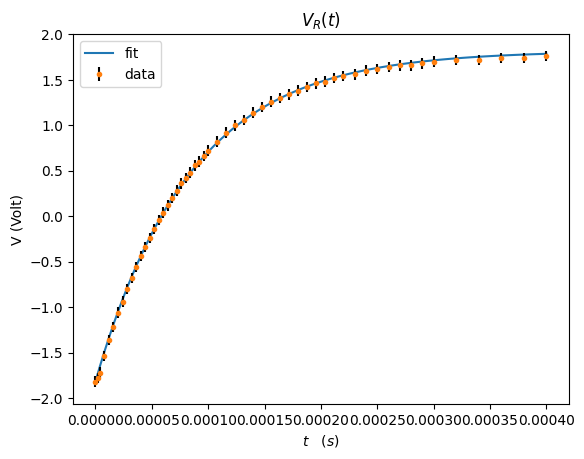

In [5]:
plt.plot(i.x_best, i.y_best, label='fit')
plt.errorbar(t, V, yerr=sigmaV, ecolor='black', fmt='.', label='data')
plt.xlabel('$t \quad (s)$')
plt.ylabel('V (Volt)')
plt.legend()
plt.title('$V_R(t)$')
plt.show()

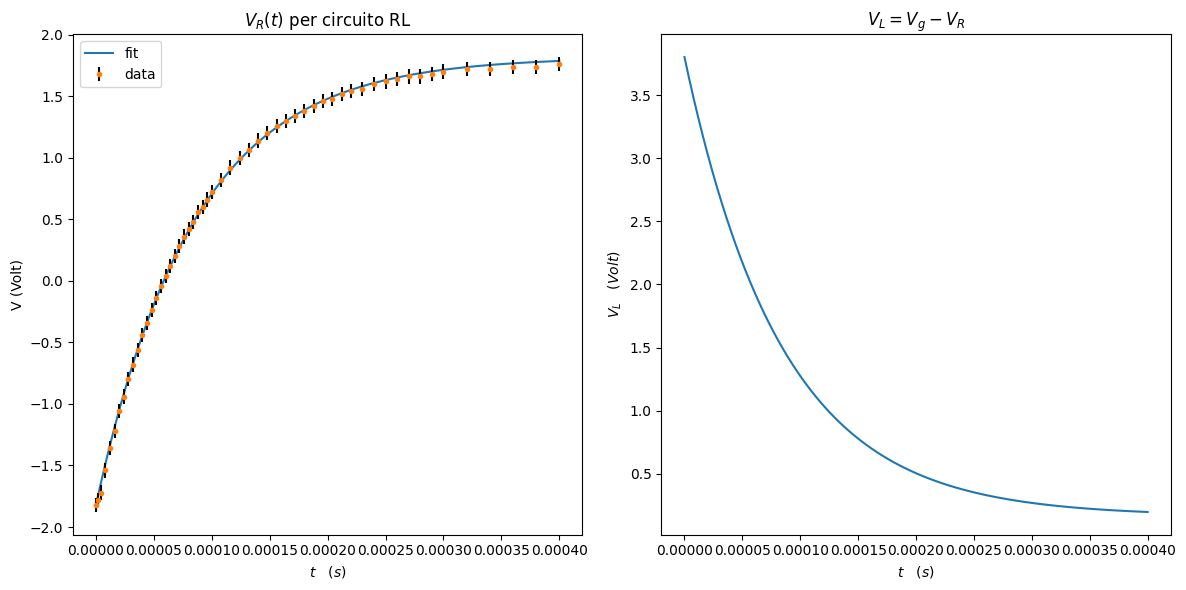

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot on the left subplot
ax1.plot(i.x_best, i.y_best, label='fit')
ax1.errorbar(t, V, yerr=sigmaV, ecolor='black', fmt='.', label='data')
ax1.set_xlabel('$t \quad (s)$')
ax1.set_ylabel('V (Volt)')
ax1.legend()
ax1.set_title('$V_R(t)$ per circuito RL')

# Plot on the right subplot
V_L = Vg - i.y_best
ax2.plot(i.x_best, V_L)
ax2.set_xlabel('$t \quad (s)$')
ax2.set_ylabel('$V_L \quad (Volt)$')
ax2.set_title('$V_L = V_g - V_R$') # TODO:  - V_{R_L}

plt.tight_layout()
plt.show()

## CONFRONTO CON VALORI ATTESI

In [17]:
τ_att = L/R 
satt = τ_att * np.sqrt((sigmaR/R)**2 + (sigmaV/Vg)**2)

τ_fit = i.bval[0]
sfit = i.sigma_bval[0]

τ = np.average([τ_att, τ_fit], weights=[1/satt**2, 1/sfit**2])
sigmaτ = 1/np.sqrt(1/satt**2 + 1/sfit**2)

print(f"τ_att = ",final_val(τ_att, satt,5,-5,'s'))
print(f"τ_fit = ",final_val(τ_fit, sfit,5,-5,'s'))
print(f"τ = ",final_val(τ, sigmaτ,5,-5,'s'))

τ_att =  (8.23293 ± 0.85744)e-5 s
τ_fit =  (8.42517 ± 0.02805)e-5 s
τ =  (8.42496 ± 0.02803)e-5 s
